In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical, plot_model

%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
unique, counts = np.unique(y_train, return_counts=True)
print('Train labels:', dict(zip(unique, counts)))

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [3]:
unique, counts = np.unique(y_test, return_counts=True)
print('Test labels:', dict(zip(unique, counts)))

Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [4]:
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = y_train[indexes]

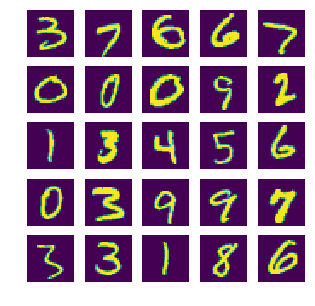

In [5]:
plt.figure(figsize=(5, 5))
for i, img in enumerate(images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
# plt.savefig('mnistSamples.png')

In [6]:
n_labels = len(np.unique(y_train))

# convert to one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
image_size = X_train.shape[1]
input_size = image_size * image_size

In [8]:
# Resize, normalize
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32') / 255
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32') / 255

In [14]:
BATCH = 128
N_HIDDEN = 256
DROPOUT = 0.45
RATE = 1 - DROPOUT
EPOCHS = 20

In [10]:
mod = Sequential()
mod.add(Dense(N_HIDDEN, input_dim=input_size))
mod.add(Activation('relu'))
mod.add(Dropout(rate=RATE))

mod.add(Dense(N_HIDDEN))
mod.add(Activation('relu'))
mod.add(Dropout(rate=RATE))

mod.add(Dense(n_labels))
mod.add(Activation('softmax'))
mod.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)  

In [13]:
plot_model(mod, to_file='mlp-mnist-MLP.png', show_shapes=True)

In [16]:
mod.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
history = mod.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.5066 - acc: 0.8410
Epoch 2/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2418 - acc: 0.9295
Epoch 3/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.1931 - acc: 0.9425
Epoch 4/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.1697 - acc: 0.9491
Epoch 5/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.1510 - acc: 0.9551
Epoch 6/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.1394 - acc: 0.9589
Epoch 7/20
60000/60000 [==============================] - 2s 42us/step - loss: 0.1308 - acc: 0.9611
Epoch 8/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.1226 - acc: 0.9626
Epoch 9/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.1168 - acc: 0.9652
Epoch 10/20
60000/60000 [===========================

In [17]:
loss, acc = mod.evaluate(X_test, y_test, batch_size=BATCH)
print(f'Test Acc: {100 * acc:.2f}')

10000/10000 [==============================] - 0s 16us/step
Test Acc: 98.02
